<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Homework - Feature Engineering</h2>
<h4>DAT-5303 | Machine Learning</h4>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Team:10

In [10]:
# importing libraries
import pandas as pd # data science essentials
import seaborn as sns # enhanced data visualization
import matplotlib.pyplot as plt

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying the path and file name
file = 'Ames Housing Dataset.xlsx'


# reading the file into Python
df = pd.read_excel(file)


# checking the file
df.head(n = 5)

,Order,Lot_Area,Street,Lot_Config,Neighborhood,Overall_Qual,Overall_Cond,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Garage_Area,Porch_Area,Pool_Area,Sale_Price
0,1,31770,Pave,Corner,NAmes,6,5,112.0,1080.0,1656,0,1656,1,0,1,7,2,2.0,528.0,272,0,215000
1,2,11622,Pave,Inside,NAmes,5,6,0.0,882.0,896,0,896,1,0,1,5,0,1.0,730.0,260,0,105000
2,3,14267,Pave,Corner,NAmes,6,6,108.0,1329.0,1329,0,1329,1,1,1,6,0,1.0,312.0,429,0,172000
3,4,11160,Pave,Corner,NAmes,7,5,0.0,2110.0,2110,0,2110,2,1,1,8,2,2.0,522.0,0,0,244000
4,5,13830,Pave,Inside,Gilbert,5,5,0.0,928.0,928,701,1629,2,1,1,6,1,2.0,482.0,246,0,189900


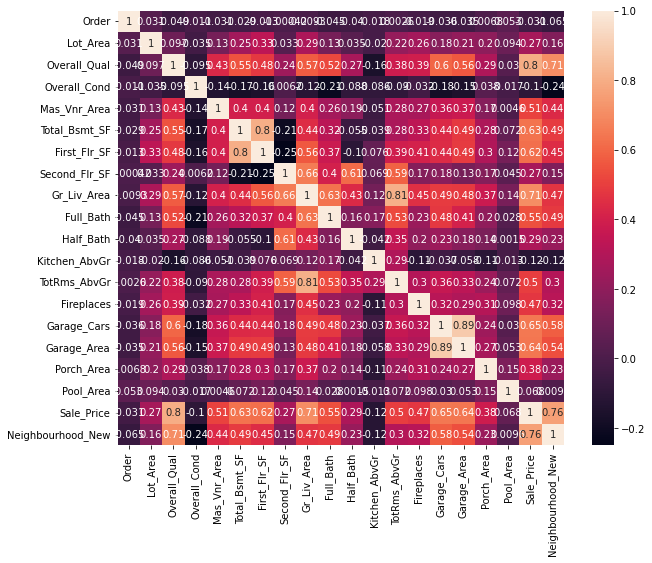

In [17]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [18]:
df['Full_Bath'].nunique()

5

In [24]:
df['Garage_Cars'].nunique()

6

In [23]:
df.skew()

C:\Users\Navys\AppData\Local\Temp\ipykernel_15856\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Order                 0.000000
Lot_Area             12.820898
Overall_Qual          0.190634
Overall_Cond          0.574429
Mas_Vnr_Area          2.606985
Total_Bsmt_SF         1.156204
First_Flr_SF          1.469429
Second_Flr_SF         0.866457
Gr_Liv_Area           1.274110
Full_Bath             0.171952
Half_Bath             0.697713
Kitchen_AbvGr         4.313825
TotRms_AbvGr          0.753543
Fireplaces            0.739215
Garage_Cars          -0.219836
Garage_Area           0.241994
Porch_Area            1.377215
Pool_Area            16.939142
Sale_Price            1.743500
Neighbourhood_New     1.091187
Total_Bath            0.308101
dtype: float64

# <hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Step 1: Hypothesize on Features to Engineer</h3><br>
Write a 2-3 sentence hypothesis on the effect you believe each new feature will have on the response variables (<em>Sale_Price</em> AND <em>log_Sale_Price</em>) in a markdown cell.

1:Neighborhood is a determinant of house price, but it cannot be handled as it is because it is an object.
So,we create a new feature , the average house price for each Neighbourhood

2: There are two columns regarding bath. When we define new variable which is the total number of bath, this might be a good predictor of the price.

3:Third, we hypothesized that the overall dwelling area would affect the price. Therefore, we examine the effect of the variable adding the underground and above-ground area and the price.

In [4]:
df.columns

Index(['Order', 'Lot_Area', 'Street', 'Lot_Config', 'Neighborhood', 'Overall_Qual', 'Overall_Cond', 'Mas_Vnr_Area', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area', 'Full_Bath', 'Half_Bath', 'Kitchen_AbvGr', 'TotRms_AbvGr', 'Fireplaces', 'Garage_Cars', 'Garage_Area', 'Porch_Area', 'Pool_Area', 'Sale_Price'], dtype='object')

# <hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 2: Code the New Features</h3><br>
Use the code cell below to develop the features you have hypothesized.

In [14]:
# New feature1 
mapping = df.groupby('Neighborhood')['Sale_Price'].mean().to_dict()

df['Neighbourhood_New'] = df['Neighborhood'].map(mapping)


In [21]:
# New feature2 
df['Total_Bath'] = df['Full_Bath'] + (df['Half_Bath'])*0.5
df['Total_Bath']

0       1.0
1       1.0
2       1.5
3       2.5
4       2.5
       ... 
2925    1.0
2926    1.0
2927    1.0
2928    1.0
2929    2.5
Name: Total_Bath, Length: 2930, dtype: float64

In [20]:
(df['Half_Bath'])*0.5

0       0.0
1       0.0
2       0.5
3       0.5
4       0.5
       ... 
2925    0.0
2926    0.0
2927    0.0
2928    0.0
2929    0.5
Name: Half_Bath, Length: 2930, dtype: float64

In [25]:
# New feature３
df['Total_Area'] = df['Total_Bsmt_SF'] + df['Gr_Liv_Area']
df['Total_Area'].head()

0    2736.0
1    1778.0
2    2658.0
3    4220.0
4    2557.0
Name: Total_Area, dtype: float64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 3: Check the Results</h3><br>
Develop a correlation matrix or a heatmap to show the linear relationships between your five new features and the response variables (<em>Sale_Price</em> AND <em>log_Sale_Price</em>).

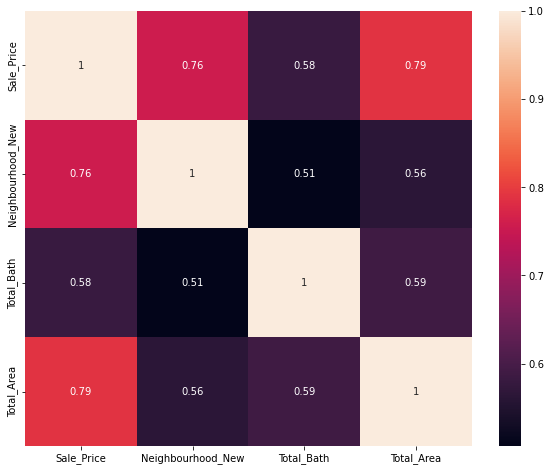

In [26]:
# plot the heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df[['Sale_Price','Neighbourhood_New','Total_Bath','Total_Area']].corr(), annot=True)
plt.show()


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 4: Explain the Results</h3><br>
Did your engineered features have the effect that was expected? Explain in 1-2 sentences for each engineered feature.

# 1: Neighbourhood_New and Sale_Price
As expected, these new features are correlated(r=0.76). This is an effective variable in predicting a price but when we need to build ML model this may cause over-fitting , which is out of scope so this is fine here.

# 2: Total_Bath and Sale_Price
Correlation between price and Full_Bath and Half_Bath are 0.55, 0.29 respectively. Correlation between new feature and price is 0.58 ,This variable was not as good as I thought it would be, so maybe it is not worth adding.

# 3: Total_Area and Sale_Price
The correlations between the original variables and prices were 0.63 and 0.71, respectively, but this time the correlation between the new variables and prices was 0.79, a strong correlation. This variable may be worth adding because the total area is easier to understand than the original variable.